 <a name="topo"></a>

# Sumário

1. [O Naufrágio do Titanic](#titanic)
2. [Análise Exploratória de Dados (AED)](#aed)  
3. [Visualização de Dados](#vidados)
4. [Engenharia de Recursos](#engenharia)
5. [Machine Learning](#ml)
6. [Validação Cruzada _(Cross-Validation)_](#cv)
7. [Matriz de Confusão](#matrix)
8. [Curvas ROC e AUC](#rocauc)
9. [Customização de Hyper-Parâmetros](#hyperparam)
10. [Ensembling](#ensembling)
11. [Importância de Recursos](#fimportance)
12. [Submissão](#submissao)             

 <a name="titanic"></a>

# O Naufrágio do Titanic
<img src="titanic.jpg" width=100%>

O naufrágio do Titanic é um dos mais infames naufrágios da história.

Em 15 de abril de 1912, durante sua viagem inaugural, o amplamente considerado "inafundável" RMS Titanic afundou após colidir com um iceberg. Infelizmente, não havia barcos salva-vidas suficientes para todos a bordo, resultando na morte de 1502 dos 2224 passageiros e tripulantes.

Embora houvesse algum elemento de sorte envolvido na sobrevivência, parece que alguns grupos de pessoas eram mais propensos a sobreviver do que outros.

Nesse desafio, pedimos que você construa um modelo preditivo que responda à pergunta: “que tipo de pessoas têm maior probabilidade de sobreviver?” Usando dados de passageiros (por exemplo, nome, idade, sexo, classe socioeconômica etc.).

Página da Competição: https://www.kaggle.com/c/titanic

Fontes de Consulta: 
* https://www.kaggle.com/startupsci/titanic-data-science-solutions
* https://www.kaggle.com/ash316/eda-to-prediction-dietanic
* https://www.kaggle.com/arthurtok/introduction-to-ensembling-stacking-in-python
* https://www.kaggle.com/ldfreeman3/a-data-science-framework-to-achieve-99-accuracy
* https://www.kaggle.com/cdeotte/titanic-using-name-only-0-81818
* https://www.kaggle.com/cdeotte/titantic-mega-model-0-84210
* https://www.kaggle.com/cdeotte/titanic-wcg-xgboost-0-84688
* https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c
* https://www.kaggle.com/reisel/save-the-families
* https://www.kaggle.com/gunesevitan/advanced-feature-engineering-tutorial-with-titanic
<br>

[início](#topo)

 <a name="aed"></a>

## Análise Exploratória de Dados (AED)
Esse passo é essencial, pois é através dele que iremos construir um entendimento intuitivo dos dados, entender como os parâmetros estão relacionados, procurar e encontrar tendências e relações entre diferentes parâmetros.

<br>

[início](#topo)

### Importar bibliotecas

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Ler train e test

In [2]:
train = pd.read_csv('titanic/train.csv')
test = pd.read_csv('titanic/test.csv')

### transformar definir o Id do Passageiro como Index

In [3]:
train.set_index('PassengerId',inplace=True)

In [4]:
test.set_index('PassengerId',inplace=True)

### Verificar shape dos dois

In [5]:
train.shape , test.shape

((891, 11), (418, 10))

In [6]:
data = pd.concat([train,test],sort=True)

### Traduzir Colunas

In [7]:
data.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'Pclass', 'Sex',
       'SibSp', 'Survived', 'Ticket'],
      dtype='object')

In [8]:
data.columns = ['Idade', 'Cabine', 'Embarque', 'Tarifa', 'Nome', 'PaisFilhos', 'Classe', 'Sexo',
       'IrmaosConjuge', 'Sobreviveu', 'Bilhete']

In [9]:
data.head(1)

,Idade,Cabine,Embarque,Tarifa,Nome,PaisFilhos,Classe,Sexo,IrmaosConjuge,Sobreviveu,Bilhete
PassengerId,,,,,,,,,,,
1,22.0,NaN,S,7.25,"Braund, Mr. Owen Harris",0,3,male,1,0.0,A/5 21171


 <a name="mapsex"></a>

### Mapear Sexo para "homem" e "mulher"

In [10]:
data['Sexo'].replace({'male':'homem','female':'mulher'},inplace=True)

In [11]:
data['Sexo'].head(4)

PassengerId
1     homem
2    mulher
3    mulher
4    mulher
Name: Sexo, dtype: object

 <a name="portembarque"></a>

### Parâmetros Categóricos  <a name="nom"></a>
* ### Nominais

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Idade          1046 non-null   float64
 1   Cabine         295 non-null    object 
 2   Embarque       1307 non-null   object 
 3   Tarifa         1308 non-null   float64
 4   Nome           1309 non-null   object 
 5   PaisFilhos     1309 non-null   int64  
 6   Classe         1309 non-null   int64  
 7   Sexo           1309 non-null   object 
 8   IrmaosConjuge  1309 non-null   int64  
 9   Sobreviveu     891 non-null    float64
 10  Bilhete        1309 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 122.7+ KB


In [13]:
# Sexo, Embarque, Sobreviveu

 <a name="ord"></a>

* ### Ordinais

In [14]:
# Classe

 <a name="paranum"></a>

### Parâmetros Numéricos  <a name="cont"></a>
* ### Contínuos

In [15]:
# Idade, Tarifa

 <a name="disc"></a>

* ### Discretos

In [16]:
# IrmaosConjuge , PaisFilhos

 <a name="paraalfa"></a>

### Parâmetros Alfanuméricos

In [17]:
# Bilhete
data['Bilhete']

PassengerId
1                A/5 21171
2                 PC 17599
3         STON/O2. 3101282
4                   113803
5                   373450
               ...        
1305             A.5. 3236
1306              PC 17758
1307    SOTON/O.Q. 3101262
1308                359309
1309                  2668
Name: Bilhete, Length: 1309, dtype: object

 <a name="missing"></a>

### Dados incompletos (faltando dados)

In [18]:
data.isnull().sum()

Idade             263
Cabine           1014
Embarque            2
Tarifa              1
Nome                0
PaisFilhos          0
Classe              0
Sexo                0
IrmaosConjuge       0
Sobreviveu        418
Bilhete             0
dtype: int64

<a name="numinfo"></a>

### Preencher Embarque com Moda

In [19]:
moda_embarque = data['Embarque'].mode()[0]
moda_embarque

'S'

In [20]:
data['Embarque'].fillna(moda_embarque,inplace=True)

### Informações Gerais (Parâmetros Numéricos)

In [21]:
data.describe()

,Idade,Tarifa,PaisFilhos,Classe,IrmaosConjuge,Sobreviveu
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,3.000000,8.000000,1.000000


 <a name="catinfo"></a>

### Informações Gerais de Parâmetros Categóricos

In [22]:
data.describe(include=['O'])

,Cabine,Embarque,Nome,Sexo,Bilhete
count,295,1309,1309,1309,1309
unique,186,3,1307,2,929
top,C23 C25 C27,S,"Kelly, Mr. James",homem,CA. 2343
freq,6,916,2,843,11


 <a name="infoamostra"></a>

## Informações da Amostra

<br>

[início](#topo)

### Tamanho da Amostra

In [23]:
len(data)

1309

### Proporção Total da Amostra em relação à População

In [24]:
len(train)/2224

0.4006294964028777

### Proporção de Sobreviventes (População)

In [25]:
1- 1502/2224

0.32464028776978415

### Proporção de Sobreviventes (Amostra)

In [26]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [27]:
342/len(train)

0.3838383838383838

 <a name="agrupamentos"></a>

# Agrupamentos

<br>

[início](#topo)

### Agrupar Classe x Sobrevivência

In [28]:
data[['Classe','Sobreviveu']].groupby(['Classe'])\
.mean().sort_values(by='Sobreviveu',ascending=True)

,Sobreviveu
Classe,
3,0.242363
2,0.472826
1,0.629630


* Passageiros de Primeira Classe são muito mais propensos a sobreviver do que de Segunda e Terceira Classe
* Passageiros de Segunda Classe são menos propensos a sobreviver do que de Primeira Classe, mas são mais propensos a sobreviver do que de Terceira Classe

### Agrupar Sexo x Sobrevivência

In [29]:
data[['Sexo','Sobreviveu']].groupby(['Sexo'])\
.mean().sort_values(by='Sobreviveu',ascending=True)

,Sobreviveu
Sexo,
homem,0.188908
mulher,0.742038


* 74% das mulheres sobreviveram em contraste com 18,89% dos homens da nossa amostra

### Agrupar IrmaosConjuge x Sobrevivência

In [30]:
data[['IrmaosConjuge','Sobreviveu']].groupby(['IrmaosConjuge'])\
.mean().sort_values(by='Sobreviveu',ascending=False)

,Sobreviveu
IrmaosConjuge,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


### Agrupar PaisFilhos x Sobrevivência

In [31]:
data[['PaisFilhos','Sobreviveu']].groupby(['PaisFilhos'])\
.mean().sort_values(by='Sobreviveu',ascending=False)

,Sobreviveu
PaisFilhos,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000
9,NaN


### Correlação de IrmaosConjuge e PaisFilhos

In [32]:
data[['IrmaosConjuge','PaisFilhos']].corr()

,IrmaosConjuge,PaisFilhos
IrmaosConjuge,1.000000,0.373587
PaisFilhos,0.373587,1.000000


* IrmaosConjuge e PaisFilhos não possuem uma correlação muito forte. Talvez seja o caso juntá-los como um único recurso depois

 <a name="vidados"></a>

# Visualização de Dados
Observar os dados de forma visual para averiguar as suposições feitas até agora

<br>

[início](#topo)

### Gráfico de Barras e Pizza de Sobreviventes

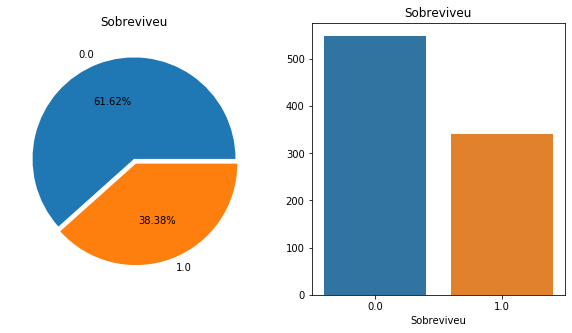

In [33]:
f, ax = plt.subplots(1,2,figsize=(10,5))
data['Sobreviveu'].value_counts().plot.pie(explode=[0,0.05],autopct='%0.2f%%',ax=ax[0])
ax[0].set_title('Sobreviveu')
ax[0].set_ylabel('')
sns.countplot('Sobreviveu',data=data,ax=ax[1])
ax[1].set_title('Sobreviveu')
ax[1].set_ylabel('')

plt.show()

## Sobrevivência Por Sexo

In [34]:
data.groupby(['Sexo','Sobreviveu'])['Sobreviveu'].count()

Sexo    Sobreviveu
homem   0.0           468
        1.0           109
mulher  0.0            81
        1.0           233
Name: Sobreviveu, dtype: int64

In [35]:
data.loc[data['Sexo']=='mulher']['Sobreviveu'].value_counts()

1.0    233
0.0     81
Name: Sobreviveu, dtype: int64

<a name="barrassob"></a>

### Gráfico de Barras de Sobreviventes por Sexo

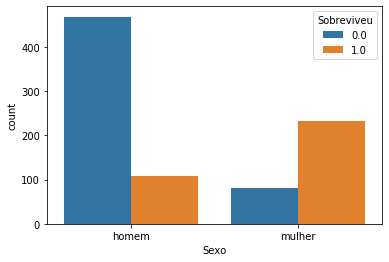

In [36]:
sns.countplot('Sexo',data=data,hue='Sobreviveu')

<a name="histidsob"></a>

### Histograma de Idade x Sobreviveu

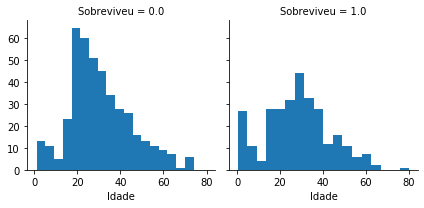

In [37]:
g = sns.FacetGrid(data, col='Sobreviveu')
g.map(plt.hist,'Idade',bins=18)

* Crianças sobreviveram mais
* Passageiro mais idoso sobreviveu
* A maioria dos passageiros estão na faixa de 18-35 anos (E a maioria não sobreviveu)

<a name="histclassidsob"></a>

### Histograma de Idade x Classe x Sobreviveu com FacetGrid

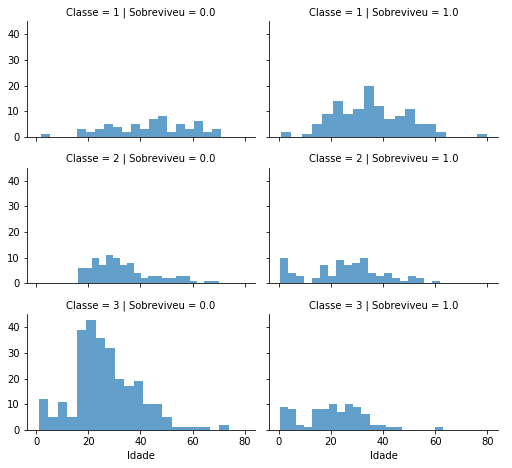

In [38]:
grid = sns.FacetGrid(data,col='Sobreviveu',row='Classe',size=2.2,aspect=1.6)
grid.map(plt.hist,'Idade',alpha=0.7,bins=20)
grid.add_legend();

<a name="chancesporto"></a>

### Chances de Sobrevivência por Porto de Embarque

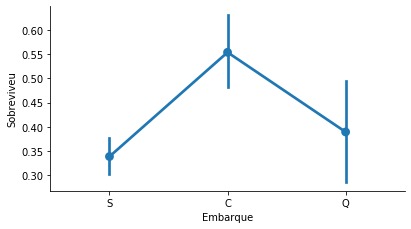

In [39]:
sns.catplot('Embarque','Sobreviveu',data=data,kind='point')
fig=plt.gcf()
fig.set_size_inches(6,3)

<a name="pointplotembarque"></a>

### Embarque x Classe x Sobreviveu

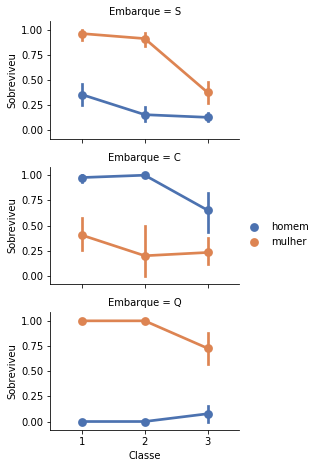

In [40]:
grid = sns.FacetGrid(data,row='Embarque',size=2.2,aspect=1.6)
grid.map(sns.pointplot,'Classe','Sobreviveu','Sexo',palette='deep')
grid.add_legend()

### Agrupar mulheres por sobrevivência

In [41]:
data.loc[data['Sexo']=='mulher'].groupby('Sobreviveu').mean()

,Idade,Tarifa,PaisFilhos,Classe,IrmaosConjuge
Sobreviveu,,,,,
0.0,25.046875,23.024385,1.037037,2.851852,1.209877
1.0,28.847716,51.938573,0.515021,1.918455,0.515021


### Agrupar homens por sobrevivência

In [42]:
data.loc[data['Sexo']=='homem'].groupby('Sobreviveu').mean()

,Idade,Tarifa,PaisFilhos,Classe,IrmaosConjuge
Sobreviveu,,,,,
0.0,31.618056,21.960993,0.207265,2.476496,0.440171
1.0,27.276022,40.821484,0.357798,2.018349,0.385321


<a name="graficobarras"></a>

### Gráfico de Barras Sexo x Tarifa por Sexo

<br>

[início](#topo)

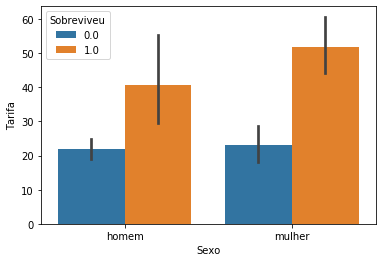

In [43]:
sns.barplot('Sexo','Tarifa',hue='Sobreviveu',data=data)

<a name="graficobarrassex"></a>

### Gráfico de Barras Sexo x Tarifa x Embarque x Sobreviveu

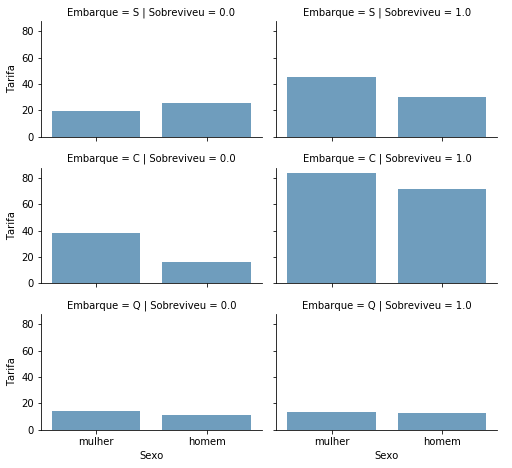

In [44]:
grid = sns.FacetGrid(data,row='Embarque',col='Sobreviveu',size=2.20,aspect=1.6)
grid.map(sns.barplot,'Sexo','Tarifa',alpha=0.7,ci=None)
grid.add_legend()

<a name="pizza"></a>

### Crosstab de Sobrevivência por Classe

In [45]:
pd.crosstab(data['Sobreviveu'],data['Classe'],margins=True)\
.style.background_gradient(cmap='OrRd')

Classe,1,2,3,All
Sobreviveu,,,,
0.0,80,97,372,549
1.0,136,87,119,342
All,216,184,491,891


<a name="vimissing"></a>

## Visualizando Dados Faltando

<br>

[início](#topo)

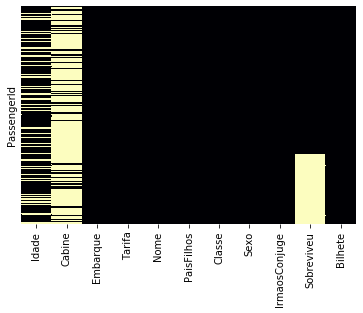

In [46]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='magma')

### Remover Cabine

In [47]:
data.drop(['Cabine'],axis=1,inplace=True)

<a name="boxplot"></a>

### Boxplot de Classe por Sexo

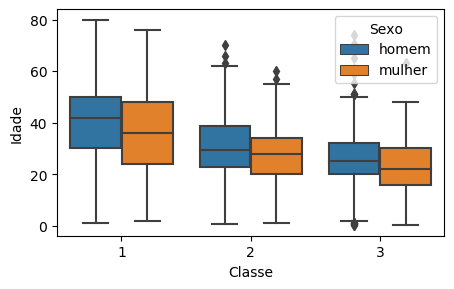

In [48]:
plt.figure(figsize=(5,3),dpi=100)
sns.boxplot(x='Classe',y='Idade',hue='Sexo',data=data)

<a name="engenharia"></a>

# Engenharia de Recursos

<br>

[início](#topo)

### Extrair Titulo do Nome

In [49]:
data['Titulo'] = data['Nome'].str.extract('([a-zA-Z]+)\.')

In [50]:
data['Titulo'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [51]:
pd.crosstab(data['Titulo'],data['Sexo'])

Sexo,homem,mulher
Titulo,,
Capt,1,0
Col,4,0
Countess,0,1
Don,1,0
Dona,0,1
Dr,7,1
Jonkheer,1,0
Lady,0,1
Major,2,0


In [52]:
data['Titulo'] = data['Titulo'].apply(lambda x:'Outros' if x not in ['Miss','Mr','Master','Mrs']else x)

In [53]:
pd.crosstab(data['Titulo'], data['Sexo'])

Sexo,homem,mulher
Titulo,,
Master,61,0
Miss,0,260
Mr,757,0
Mrs,0,197
Outros,25,9


### Traduzir "Titulos"

In [54]:
data.loc[data['Titulo']=='Master'].mean()

Idade             5.482642
Tarifa           36.008195
PaisFilhos        1.377049
Classe            2.655738
IrmaosConjuge     2.049180
Sobreviveu        0.575000
dtype: float64

In [55]:
data['Titulo'].replace({'Master':'Menino','Miss':'Solteira','Mr':'HomemAdulto','Mrs':'Casada'},inplace=True)

In [56]:
pd.crosstab(data['Titulo'], data['Sexo'])

Sexo,homem,mulher
Titulo,,
Casada,0,197
HomemAdulto,757,0
Menino,61,0
Outros,25,9
Solteira,0,260


# Mulheres e Crianças sobreviveram ou morreram juntos?

## Extrair sobrenome para identificar possíveis famílias

In [57]:
['Braund','Mr. Owen Harris'][0]

'Braund'

### Criar Feature Sobrenome da Família

In [58]:
data['Sobrenome'] = data['Nome'].str.split(',').str[0]

### Verificar as maiores famílias

In [59]:
data.groupby(['Sobrenome'])['Nome'].count().sort_values(ascending=False)

Sobrenome
Sage         11
Andersson    11
Asplund       8
Goodwin       8
Davies        7
             ..
Moutal        1
Moussa        1
Moss          1
Morrow        1
Abbing        1
Name: Nome, Length: 875, dtype: int64

### Analisar Sobrevivência de Mulheres e Crianças da Família "Andersson"

In [60]:
data[['Sobreviveu','Titulo','Sobrenome','Bilhete']].loc[data['Sobrenome']=='Andersson']\
.loc[(data['Sexo']=='mulher') | (data['Titulo']=='Menino')]

,Sobreviveu,Titulo,Sobrenome,Bilhete
PassengerId,,,,
69,1.0,Solteira,Andersson,3101281
120,0.0,Solteira,Andersson,347082
542,0.0,Solteira,Andersson,347082
543,0.0,Solteira,Andersson,347082
611,0.0,Casada,Andersson,347082
814,0.0,Solteira,Andersson,347082
851,0.0,Menino,Andersson,347082
1106,NaN,Solteira,Andersson,347091


### Mulheres e Crianças da Família "Sage"

In [61]:
data[['Sobreviveu','Titulo','Sobrenome','Bilhete']].loc[data['Sobrenome']=='Sage']\
.loc[(data['Sexo']=='mulher') | (data['Titulo']=='Menino')]

,Sobreviveu,Titulo,Sobrenome,Bilhete
PassengerId,,,,
160,0.0,Menino,Sage,CA. 2343
181,0.0,Solteira,Sage,CA. 2343
793,0.0,Solteira,Sage,CA. 2343
864,0.0,Solteira,Sage,CA. 2343
1080,NaN,Solteira,Sage,CA. 2343
1252,NaN,Menino,Sage,CA. 2343
1257,NaN,Casada,Sage,CA. 2343


### Mulheres e Crianças da Família "Brown"

In [62]:
data[['Sobreviveu','Titulo','Sobrenome','Bilhete']].loc[data['Sobrenome']=='Brown']\
.loc[(data['Sexo']=='mulher') | (data['Titulo']=='Menino')]

,Sobreviveu,Titulo,Sobrenome,Bilhete
PassengerId,,,,
195,1.0,Casada,Brown,PC 17610
346,1.0,Solteira,Brown,248733
671,1.0,Casada,Brown,29750
1067,NaN,Solteira,Brown,29750
1248,NaN,Casada,Brown,11769


### Criar DataFrame "MulherOuCrianca"

In [63]:
MulherOuCrianca = data.loc[(data['Sexo']=='mulher') | (data['Titulo']=='Menino')]

In [64]:
MulherOuCrianca['Titulo'].unique()

array(['Casada', 'Solteira', 'Menino', 'Outros'], dtype=object)

### Criar Feature "TamanhoGrupo"
Referente a quantidade de Pessoas que possuem o mesmo sobrenome

In [65]:
MulherOuCrianca.loc[MulherOuCrianca['Sobrenome']=='Brown']['Sobreviveu'].count()

3

In [66]:
data['TamanhoGrupo'] = data['Sobrenome'].apply(lambda x:MulherOuCrianca.loc[MulherOuCrianca['Sobrenome']==x]['Sobreviveu'].count())

### Sobrevivência Família "Andersson"

In [67]:
data[['TamanhoGrupo','Sobrenome','Titulo','Sobreviveu']].sort_values(by='TamanhoGrupo',ascending=False).head(10)

,TamanhoGrupo,Sobrenome,Titulo,Sobreviveu
PassengerId,,,,
1212,7,Andersson,HomemAdulto,NaN
69,7,Andersson,Solteira,1.0
611,7,Andersson,Casada,0.0
120,7,Andersson,Solteira,0.0
147,7,Andersson,HomemAdulto,1.0
1106,7,Andersson,Solteira,NaN
814,7,Andersson,Solteira,0.0
543,7,Andersson,Solteira,0.0
851,7,Andersson,Menino,0.0


In [68]:
for idx,_ in data.iterrows():
    if data['Titulo'].at[idx] == 'HomemAdulto':
        data['TamanhoGrupo'].at[idx] = 0

### Criar Recurso "SobrevivenciaGrupo"

In [69]:
data[['Titulo','Sobreviveu']].loc[data['Sobrenome']=='Andersson']\
.loc[(data['Sexo']=='mulher') | (data['Titulo']=='Menino')].mean()['Sobreviveu']

0.14285714285714285

In [70]:
data['SobrevivenciaGrupo'] = data['Sobrenome'].apply(lambda x:data[['Titulo','Sobreviveu']].loc[data['Sobrenome']== x]\
.loc[(data['Sexo']=='mulher') | (data['Titulo']=='Menino')].mean()['Sobreviveu'])

In [71]:
for idx,_ in data.iterrows():
    if data['Titulo'].at[idx] == 'HomemAdulto':
        data['SobrevivenciaGrupo'].at[idx] = 0

In [72]:
data[['SobrevivenciaGrupo','Titulo']]

,SobrevivenciaGrupo,Titulo
PassengerId,,
1,0.0,HomemAdulto
2,1.0,Casada
3,1.0,Solteira
4,1.0,Casada
5,0.0,HomemAdulto
...,...,...
1305,0.0,HomemAdulto
1306,NaN,Outros
1307,0.0,HomemAdulto


In [73]:
data['SobrevivenciaGrupo'].isnull().sum()

119

In [74]:
data['SobrevivenciaGrupo'].fillna(0,inplace=True)

In [75]:
data['SobrevivenciaGrupo'].isnull().sum()

0

###  Grupos de Mulheres e Criancas onde todos morreram juntos

In [76]:
data[['Sobrenome','Titulo']].loc[(data['SobrevivenciaGrupo']==0)\
        & (data['TamanhoGrupo']>1)]\
        .loc[(data['Sexo']=='mulher') | (data['Titulo']=='Menino')]['Sobrenome'].unique()

array(['Palsson', 'Rice', 'Vander Planke', 'Panula', 'Goodwin', 'Skoog',
       'Zabour', 'Jussila', 'Boulos', 'Ford', 'Sage', 'Lefebre', 'Strom',
       'Barbara', 'Van Impe', 'Bourke'], dtype=object)

### Quantidade de Pessoas (morreram)

In [77]:
data[['Sobrenome','Titulo','Sobreviveu']].loc[(data['SobrevivenciaGrupo']==0)\
        & (data['TamanhoGrupo']>1)]\
        .loc[(data['Sexo']=='mulher') | (data['Titulo']=='Menino')]['Sobreviveu'].count()

50

###  Grupos de Mulheres e Criancas onde todos sobreviveram juntos

In [78]:
data[['Sobrenome','Titulo']].loc[(data['SobrevivenciaGrupo']==1)\
        & (data['TamanhoGrupo']>1)]\
        .loc[(data['Sexo']=='mulher') | (data['Titulo']=='Menino')]['Sobrenome'].unique()

array(['Johnson', 'Sandstrom', 'Nicola-Yarred', 'Laroche', 'Harper',
       'West', 'Moubarek', 'Caldwell', 'Fortune', 'Doling', 'Peter',
       'Goldsmith', 'Becker', 'Navratil', 'Brown', 'Newell', 'Collyer',
       'Murphy', 'Hamalainen', 'Graham', 'Mellinger', 'Kelly', 'Hays',
       'Ryerson', 'Wick', 'Hippach', 'Coutts', 'Richards', 'Hart',
       'Baclini', 'Quick', 'Taussig', 'Herman', 'Moor'], dtype=object)

### Quantidade de Pessoas (sobreviveram)

In [79]:
data[['Sobrenome','Titulo','Sobreviveu']].loc[(data['SobrevivenciaGrupo']==1)\
        & (data['TamanhoGrupo']>1)]\
        .loc[(data['Sexo']=='mulher') | (data['Titulo']=='Menino')]['Sobreviveu'].count()

74

###  Grupos de Mulheres e Criancas com sobrevivência mista

In [80]:
data[['Sobrenome','Titulo']].loc[(data['SobrevivenciaGrupo']>0) \
        & (data['SobrevivenciaGrupo']<1)             
        & (data['TamanhoGrupo']>1)] \
.loc[(data['Sexo']=='mulher') | (data['Titulo']=='Menino')]['Sobrenome'].unique()

array(['Asplund', 'Andersson', 'Allison', 'Carter'], dtype=object)

### Quantidade de Pessoas (sobrevivência mista)

In [81]:
data[['Sobrenome','Titulo','Sobreviveu']].loc[(data['SobrevivenciaGrupo']>0) \
        & (data['SobrevivenciaGrupo']<1)             
        & (data['TamanhoGrupo']>1)] \
.loc[(data['Sexo']=='mulher') | (data['Titulo']=='Menino')]['Sobreviveu'].count()

18

### Criar Recurso ExpecativaDeVida

In [82]:
data['ExpectativaDeVida'] = ''
# viver
# morrer
# desconhecida

In [83]:
for idx,_ in data.iterrows():
    if(data['SobrevivenciaGrupo'].at[idx]==0) & (data['TamanhoGrupo'].at[idx] > 1):
        data['ExpectativaDeVida'].at[idx] = 'morrer'
    elif (data['SobrevivenciaGrupo'].at[idx]==1) & (data['TamanhoGrupo'].at[idx] > 1):
        data['ExpectativaDeVida'].at[idx] = 'viver'
    else:
        data['ExpectativaDeVida'].at[idx] = 'desconhecido'

In [84]:
pd.crosstab (data['ExpectativaDeVida'] ,data['Sobreviveu'])

Sobreviveu,0.0,1.0
ExpectativaDeVida,,
desconhecido,498,268
morrer,50,0
viver,1,74


### Poderíamos linkar com o Bilhete
Uma vez que não necessariamente esses grupos são da mesma família, e nem todos que possuem o mesmo sobrenome são da mesma família. Porém, existem divergências ao análisar apenas os bilhetes. O ideal seria combiná-los para gerar ainda mais insights.

<a name="dummy"></a>

### Remover Colunas que não serão mais utilizadas

In [85]:
data.isnull().sum()

Idade                 263
Embarque                0
Tarifa                  1
Nome                    0
PaisFilhos              0
Classe                  0
Sexo                    0
IrmaosConjuge           0
Sobreviveu            418
Bilhete                 0
Titulo                  0
Sobrenome               0
TamanhoGrupo            0
SobrevivenciaGrupo      0
ExpectativaDeVida       0
dtype: int64

In [86]:
data.drop(['Nome','Bilhete','Sobrenome'],axis=1,inplace=True)

# Variáveis Dummy

<br>

[início](#topo)

In [87]:
data.describe(include='O')

,Embarque,Sexo,Titulo,ExpectativaDeVida
count,1309,1309,1309,1309
unique,3,2,5,3
top,S,homem,HomemAdulto,desconhecido
freq,916,843,757,1159


In [88]:
data = pd.get_dummies(data,columns=['Classe',
                                    'Embarque',
                                    'Titulo',
                                    'ExpectativaDeVida',
                                    'Sexo'],drop_first=True)

In [96]:
data.shape

(1309, 18)

# Usar Predição da Idade

<br>

[início](#topo)

In [97]:
idade = pd.read_csv('idade_completa.csv')

In [99]:
idade.set_index('IdPassageiro',inplace=True)

In [101]:
idade.shape

(1309, 1)

In [104]:
data.drop('Idade',axis=1,inplace=True)

In [105]:
data = pd.concat([data,idade],axis=1)

In [106]:
data.shape

(1309, 18)

## Preencher Tarifa Faltando Com a Média

<br>

[início](#topo)

In [107]:
data.isnull().sum()

Tarifa                        1
PaisFilhos                    0
IrmaosConjuge                 0
Sobreviveu                  418
TamanhoGrupo                  0
SobrevivenciaGrupo            0
Classe_2                      0
Classe_3                      0
Embarque_Q                    0
Embarque_S                    0
Titulo_HomemAdulto            0
Titulo_Menino                 0
Titulo_Outros                 0
Titulo_Solteira               0
ExpectativaDeVida_morrer      0
ExpectativaDeVida_viver       0
Sexo_mulher                   0
Idade                         0
dtype: int64

In [110]:
tarifa_media = data['Tarifa'].mean()
tarifa_media

33.2954792813456

In [111]:
data['Tarifa'].fillna(tarifa_media,inplace=True)

In [112]:
data.isnull().sum()

Tarifa                        0
PaisFilhos                    0
IrmaosConjuge                 0
Sobreviveu                  418
TamanhoGrupo                  0
SobrevivenciaGrupo            0
Classe_2                      0
Classe_3                      0
Embarque_Q                    0
Embarque_S                    0
Titulo_HomemAdulto            0
Titulo_Menino                 0
Titulo_Outros                 0
Titulo_Solteira               0
ExpectativaDeVida_morrer      0
ExpectativaDeVida_viver       0
Sexo_mulher                   0
Idade                         0
dtype: int64

<a name="faixaetaria"></a>

# Criar Faixa Etária

<br>

[início](#topo)

In [113]:
data['Idade'].astype('int')

1       22
2       38
3       26
4       35
5       35
        ..
1305    29
1306    39
1307    38
1308    29
1309     0
Name: Idade, Length: 1309, dtype: int64

In [115]:
data['FaixaEtaria'] = pd.cut(data['Idade'].astype('int'),bins=5)

In [116]:
pd.crosstab(data['FaixaEtaria'],data['Sobreviveu'])

Sobreviveu,0.0,1.0
FaixaEtaria,,
"(-0.08, 16.0]",55,58
"(16.0, 32.0]",318,165
"(32.0, 48.0]",127,88
"(48.0, 64.0]",39,30
"(64.0, 80.0]",10,1


 <a name="dummyfe"></a>

### Dummy Faixa Etaria

In [117]:
data = pd.get_dummies(data,columns=['FaixaEtaria'],drop_first=True)

In [118]:
data.shape

(1309, 22)

 <a name="familiares"></a>

### Criar Recurso "Familiares" _(Feature Engeneering)_ 
Baseados em IrmaosConjuge e PaisFilhos

<br>

[início](#topo)

In [119]:
data['Familiares'] = data['IrmaosConjuge']+data['PaisFilhos']

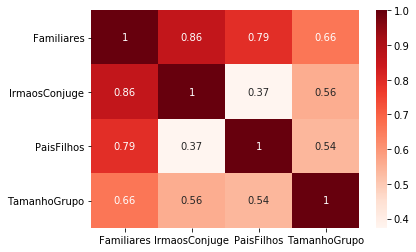

In [128]:
sns.heatmap(data[['Familiares','IrmaosConjuge','PaisFilhos','TamanhoGrupo']].corr(),annot=True,cmap='Reds')

 <a name="sozinho"></a>

### Criar Parâmetro "Sozinho"_(Feature Engeneering)_
Pessoa que não está com nenhum familiar

<br>

[início](#topo)

In [130]:
sozinho = data['Familiares'] == 0

In [132]:
sozinho.map({True:1,False:0})

1       0
2       0
3       1
4       0
5       1
       ..
1305    1
1306    1
1307    1
1308    1
1309    0
Name: Familiares, Length: 1309, dtype: int64

In [133]:
data['Sozinho'] = sozinho.map({True:1,False:0})

In [134]:
data.shape

(1309, 24)

## Atualizar train e test 

In [136]:
train.shape

(891, 24)

In [135]:
train = data.loc[train.index]

In [137]:
train.shape

(891, 24)

In [139]:
test.shape

(418, 24)

In [140]:
test = data.loc[test.index]

In [142]:
test.shape

(418, 24)

In [144]:
test.drop('Sobreviveu',axis=1,inplace=True)

In [145]:
test.shape

(418, 23)

In [147]:
test.isnull().sum()

Tarifa                      0
PaisFilhos                  0
IrmaosConjuge               0
TamanhoGrupo                0
SobrevivenciaGrupo          0
Classe_2                    0
Classe_3                    0
Embarque_Q                  0
Embarque_S                  0
Titulo_HomemAdulto          0
Titulo_Menino               0
Titulo_Outros               0
Titulo_Solteira             0
ExpectativaDeVida_morrer    0
ExpectativaDeVida_viver     0
Sexo_mulher                 0
Idade                       0
FaixaEtaria_(16.0, 32.0]    0
FaixaEtaria_(32.0, 48.0]    0
FaixaEtaria_(48.0, 64.0]    0
FaixaEtaria_(64.0, 80.0]    0
Familiares                  0
Sozinho                     0
dtype: int64

In [148]:
train.isnull().sum()

Tarifa                      0
PaisFilhos                  0
IrmaosConjuge               0
Sobreviveu                  0
TamanhoGrupo                0
SobrevivenciaGrupo          0
Classe_2                    0
Classe_3                    0
Embarque_Q                  0
Embarque_S                  0
Titulo_HomemAdulto          0
Titulo_Menino               0
Titulo_Outros               0
Titulo_Solteira             0
ExpectativaDeVida_morrer    0
ExpectativaDeVida_viver     0
Sexo_mulher                 0
Idade                       0
FaixaEtaria_(16.0, 32.0]    0
FaixaEtaria_(32.0, 48.0]    0
FaixaEtaria_(48.0, 64.0]    0
FaixaEtaria_(64.0, 80.0]    0
Familiares                  0
Sozinho                     0
dtype: int64

## Utilizar train para treinar o modelo

In [151]:
X = train.drop('Sobreviveu',axis=1)

In [149]:
y = train['Sobreviveu']

In [152]:
X.shape, y.shape

((891, 23), (891,))

### Escolher colunas

In [153]:
X.columns

Index(['Tarifa', 'PaisFilhos', 'IrmaosConjuge', 'TamanhoGrupo',
       'SobrevivenciaGrupo', 'Classe_2', 'Classe_3', 'Embarque_Q',
       'Embarque_S', 'Titulo_HomemAdulto', 'Titulo_Menino', 'Titulo_Outros',
       'Titulo_Solteira', 'ExpectativaDeVida_morrer',
       'ExpectativaDeVida_viver', 'Sexo_mulher', 'Idade',
       'FaixaEtaria_(16.0, 32.0]', 'FaixaEtaria_(32.0, 48.0]',
       'FaixaEtaria_(48.0, 64.0]', 'FaixaEtaria_(64.0, 80.0]', 'Familiares',
       'Sozinho'],
      dtype='object')

In [284]:
recursos = ['Tarifa', 'PaisFilhos', 'IrmaosConjuge', 'TamanhoGrupo',
       'SobrevivenciaGrupo', 'Classe_2', 'Classe_3', 'Embarque_Q',
       'Embarque_S', 'Titulo_HomemAdulto', 'Titulo_Menino', 'Titulo_Outros',
       'Titulo_Solteira', 'ExpectativaDeVida_morrer',
       'ExpectativaDeVida_viver', 'Sexo_mulher', 'Idade',
       'Familiares',
       'Sozinho']

In [285]:
X = X[recursos]

### Averiguando Shapes 

In [286]:
X.shape ,y.shape

((891, 19), (891,))

### Importar train_test_split para dividir e preparar para treino

In [287]:
from sklearn.model_selection import train_test_split

### Dividir 70% para treinar, 30% para testar

In [288]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=123)

In [289]:
X_train.shape,y_train.shape

((623, 19), (623,))

In [290]:
X_test.shape,y_test.shape

((268, 19), (268,))

<a name="ml"></a>

# Machine Learning <a name="modelospred"></a>

<br>

[início](#topo)

## Importando Modelos Preditivos

In [163]:
from sklearn.ensemble import (AdaBoostClassifier, 
                              GradientBoostingClassifier, 
                              ExtraTreesClassifier,
                              RandomForestClassifier)

In [164]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

<a name="LogisticRegression"></a>

### Criar classe ModeloAuxiliar 
Uma classe modelo para evitar duplicação de códigos

In [91]:
class ModeloAuxiliar(object):
    def __init__(self, clf, seed=123, params=None):
        if params:
            params['random_state'] = seed
            self.clf = clf(**params)
        else:
            self.clf = clf()
    def predict(self, x):
        return self.clf.predict(x)
    
    def fit(self,x,y):
        return self.clf.fit(x,y)
    
    def feature_importances(self,x,y):
        return self.clf.fit(x,y).feature_importances_
    
    def score(self,x,y):
        return self.clf.score(x,y)

In [92]:
modelos = [{'nome': 'logreg',
            'modelo': LogisticRegression},
           {'nome': 'etree',
            'modelo': ExtraTreesClassifier},
           {'nome': 'gradboost',
             'modelo': GradientBoostingClassifier}, 
           {'nome': 'adaboost',
             'modelo': AdaBoostClassifier},
           {'nome': 'SVC',
            'modelo': SVC},
           {'nome': 'KNN',
            'modelo': KNeighborsClassifier},
           {'nome': 'GaussianNB',
            'modelo': GaussianNB},
           {'nome': 'Perceptron',
            'modelo': Perceptron},
           {'nome': 'LinearSVC',
            'modelo': LinearSVC},
           {'nome': 'SGD',
            'modelo': SGDClassifier},
           {'nome': 'Dtree',
            'modelo': DecisionTreeClassifier},
           {'nome': 'RForest',
            'modelo': RandomForestClassifier}
          ]

In [165]:
modelos[1]['modelo']

sklearn.ensemble._forest.ExtraTreesClassifier

In [169]:
resultados = []
for model in modelos:
    x = ModeloAuxiliar (clf=model['modelo'])
    # treinar o modelo
    x.fit(X_train,y_train)
    
    # gerar predicao
    x_pred = x.predict(X_test)
    
    # gerar score
    acuracidade = round(x.score(X_test,y_test)*100,2)
    
    resultados.append(({'nome':model['nome'],
                       'score':acuracidade,
                       'pred':x_pred}))
    

<a name="ranking"></a>

# Ranking de Modelos Por Score

<br>

[início](#topo)

In [170]:
models = pd.DataFrame(resultados)

In [172]:
models[['nome','score']].sort_values(by='score',ascending=False)

,nome,score
2,gradboost,91.42
3,adaboost,90.30
0,logreg,89.93
8,LinearSVC,88.81
11,RForest,88.06
6,GaussianNB,85.07
1,etree,84.70
10,Dtree,82.46
9,SGD,80.22
5,KNN,75.75


<a name="cv"></a>

# Validação Cruzada _(Cross-Validation)_

<br>

[início](#topo)

In [93]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import cross_val_predict 

In [173]:
kfold = KFold(n_splits=10,random_state=123)

In [174]:
ada = AdaBoostClassifier(n_estimators=200,random_state=123,learning_rate=0.1)

In [177]:
resultado = cross_val_score(ada,X_train,y_train,cv=kfold,scoring='accuracy')
print('O score cross-validado do AdaBoost é :',resultado.mean())

O score cross-validado do AdaBoost é : 0.8923195084485407


In [178]:
resultado

array([0.9047619 , 0.9047619 , 0.95238095, 0.85483871, 0.87096774,
       0.87096774, 0.87096774, 0.91935484, 0.91935484, 0.85483871])

In [179]:
ada.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.1,
                   n_estimators=200, random_state=123)

In [181]:
ada_pred = ada.predict(X_test)
ada_pred

array([1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0.,
       1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0.

<a name="matrix"></a>

# Matriz de Confusão 

Essa média as vezes pode ser enganosa. Nós podemos analisar a Matriz de Confusão _(Confusion Matrix)_ que nos mostra aonde o modelo errou. Falsos Positivos x Falso Negativos.

<br>

[início](#topo)

In [182]:
from sklearn.metrics import confusion_matrix

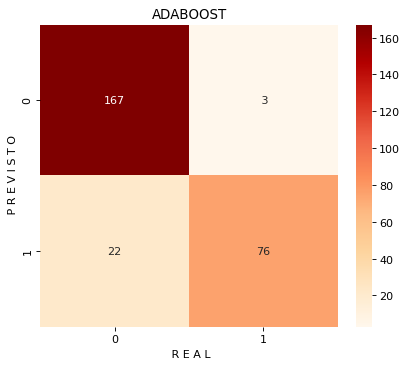

In [194]:
plt.figure(figsize=(6,5),dpi=80)
sns.heatmap(confusion_matrix(y_test,ada_pred),cmap='OrRd',annot=True,fmt='2.0f')
plt.title('ADABOOST')
plt.ylabel(' P R E V I S T O')
plt.xlabel(' R E A L')
plt.show()

### Interpretando a Matriz de Confusão
A diagonal da esquerda mostra o total de predições corretas, a da direita mostra o total de predições erradas.

* O número de predições corretas para AdaBoost é de **167(para mortos) + 76(sobreviventes)**.<br><br>

* **Erros**  
    * Classificou erradamente **3 como mortos (falso negativo)** 
    * E **22 como vivos (falso positivo)**

<a name="precision"></a>

$$Precisão = {\frac {Verdadeiros Positivos}{Verdadeiros Positivos + Falsos Positivos}} $$

<a name="accuracy"></a>

$$Revocação = {\frac {Verdadeiros Positivos}{Verdadeiros Positivos + Falsos Negativos}} $$

<a name="accuracy"></a>

$$Acuracidade = {\frac {Verdadeiros Positivos+Verdadeiros Negativos}{Total}} $$

<a name="accuracy"></a>

$$F1-Score = 2 x{\frac {Precisão \cdot Revocação}{Precisão + Revocação}} $$

### Importando métricas do Sklearn

In [197]:
from sklearn.metrics import (recall_score,
                             accuracy_score,
                             precision_score,
                             f1_score)

### Revocação

In [198]:
recall_score(y_test,ada_pred)

0.7755102040816326

### Acuracidade

In [199]:
accuracy_score(y_test,ada_pred)

0.9067164179104478

### Precisão

In [200]:
precision_score(y_test,ada_pred)

0.9620253164556962

### F1-Score

In [201]:
f1_score(y_test,ada_pred)

0.8587570621468926

<a name="rocauc"></a>

# Curvas ROC e AUC 

O formato da curva contem várias informações, dentre elas, a taxa esperada de falsos positivos e taxa esperada de falsos negativos. 
* O quanto menor for o eixo x menor a quantidade de falsos positivos e maior verdadeiros negativos. 
* Quanto maiores os valores no eixo y, maior a quantidade de verdadeiros positivos e menor a quantidade de falsos negativos.

<br>

[início](#topo)

In [202]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

Sem habilidade : ROC AUC=0.500
AdaBoost: ROC AUC=0.934


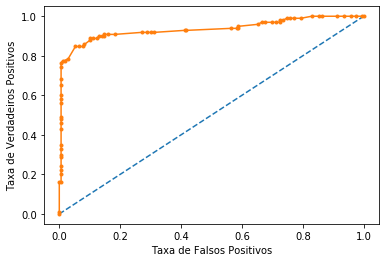

In [229]:
ns_probs = [0 for _ in range(len(y_test))] # no skill

ada_probs = ada.predict_proba(X_test)

ada_probs = ada_probs[:,1]

ns_auc = roc_auc_score(y_test,ns_probs)
ns_auc

ada_auc = roc_auc_score(y_test,ada_probs)
ada_auc

print('Sem habilidade : ROC AUC=%.3f'%(ns_auc))
print('AdaBoost: ROC AUC=%.3f'%(ada_auc))

ns_tfp,ns_tvp,_ = roc_curve(y_test,ns_probs)
ada_tfp,ada_tvp,_ = roc_curve(y_test,ada_probs)

plt.plot(ns_tfp,ns_tvp,linestyle='--',label='Sem habilidade')
plt.plot(ada_tfp,ada_tvp,marker='.',label='AdaBoost')

plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')

plt.show()

## Selecionando Threshold (Limite)

In [252]:
pred_proba = ada_probs >= 0.5

In [253]:
pred_proba = pd.Series(pred_proba).map({False:0,True:1}).values
pred_proba

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1])

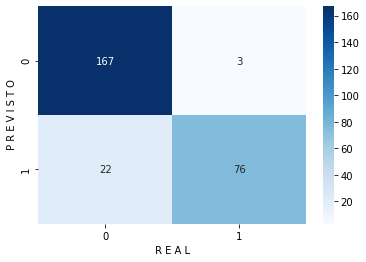

In [254]:
sns.heatmap(confusion_matrix(y_test,pred_proba),cmap='Blues',annot=True,fmt='2.0f')
plt.ylabel(' P R E V I S T O')
plt.xlabel(' R E A L ')
plt.show()

<a name="hyperparam"></a>

# Customização de Hyper-Parâmetros 

<br>

[início](#topo)

**Parâmetros**

**n_jobs**: Quantidade de núcleos do CPU usados no processo de treino do modelo preditivo. Se for -1, todos os núcleos serão usados.

**n_estimators**: Quantidade de árvores de classificação usadas no modelo preditivo (10 é o padrão)

**max_depth**: Profundidade de árvore ou a quantidade de nós que ela deve se expandir. Se esse valor for muito alto, existe a chance de o modelo super-adequar _(overfit)_ o modelo.

**min_samples_leaf**: O número mínimo de amostras requeridas para ser considerado um ramo. Isso tende a suavizar o modelo.

**verbose**: Controla a saída de textos durante o processo de aprendizagem/treino. O valor 0 não mostra nenhum texto, enquanto 3 mostra o processo de aprendizagem de árvore a cada iteração.

In [255]:
from sklearn.model_selection import GridSearchCV

* ### Random Forest

In [259]:
rf_params = {
    'n_estimators':[100,200],
    'max_depth':[2,4],
    'min_samples_leaf':[1,2,3]
}

gd = GridSearchCV(estimator=RandomForestClassifier(random_state=123),
                 param_grid=rf_params,verbose=True)

gd.fit(X_train,y_train)

print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   19.9s finished


0.8908903225806452
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)


In [261]:
gd_pred = gd.predict(X_test)
gd_pred

array([1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0.,
       1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0.

<a name="ensembling"></a>

# Ensembling
Uma forma de aumentar a acuracidade ou performance do modelo preditivo. Ensembling é a combinação de vários modelos preditivos de forma a ter uma versão final mais poderosa e mais estável. Ensembling pode ser feito de 3 formas:
* Classificão de Votos (Voting Classifier)
* Ensacamento (Bagging)
* Impulsionamento (Boosting)

<br>

[início](#topo)

<a name="voting"></a>

* ### Classificação de Votos

In [262]:
misturados = [('KNN',KNeighborsClassifier(n_neighbors=10)),
             ('RBF',SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
             ('RFor',RandomForestClassifier(n_estimators=100,random_state=123)),
             ('LR',LogisticRegression(C=0.05)),
             ('DT',DecisionTreeClassifier(random_state=123)),
             ('NB',GaussianNB()),
             ('svm',SVC(kernel='linear',probability=True))]

In [264]:
from sklearn.ensemble import VotingClassifier

meu_ensemble = VotingClassifier(estimators=misturados,voting='soft').fit(X_train,y_train)

print('Score',meu_ensemble.score(X_test,y_test))
cross = cross_val_score(meu_ensemble,X_test,y_test,cv=10,scoring='accuracy') 
print('Score cross-validado',cross)

Score 0.8917910447761194
Score cross-validado [0.96296296 0.96296296 0.81481481 0.85185185 0.85185185 0.92592593
 0.85185185 0.74074074 0.92307692 0.92307692]


In [265]:
cross.mean()

0.8809116809116808

<a name="bagging"></a>

* ### Ensacamento
O Ensacamento aplica classificadores similares em pequenas partições, depois tira a média reduzindo a variância. Diferente da técnica de Classificação de Votos, Ensacamento usa classificadores similares aumentando a estabilidade. 

* #### Ensacamento KNN
Ele é ideal para usar com modelos que possuem muita variância. Pode ser usado com um pequeno valor de n_neighbours, como com um pequeno valor de n_estimators.

In [95]:
from sklearn.ensemble import BaggingClassifier

In [266]:
knn = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3),
                       random_state=123,n_estimators=100)

knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)

print('Score',knn.score(X_test,y_test))
cross = cross_val_score(knn,X_test,y_test,cv=10,scoring='accuracy') 
print('Score cross-validado',cross.mean())

Score 0.7313432835820896
Score cross-validado 0.7237891737891738


* #### Ensacamento DecisionTree


In [267]:
dtree = BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                       random_state=123,n_estimators=100)

dtree.fit(X_train,y_train)
dtree_pred = dtree.predict(X_test)

print('Score',dtree.score(X_test,y_test))
cross = cross_val_score(dtree,X_test,y_test,cv=10,scoring='accuracy') 
print('Score cross-validado',cross.mean())

Score 0.8880597014925373
Score cross-validado 0.8735042735042736


<a name="boosting"></a>

* ### Impulsionamento
Impulsionamento é uma técnica ensembling que usa aprendizado sequenciado de classificadores. É um melhoramento gradual de um modelo fraco. O modelo é treinado no dataframe completo, de forma a focar nos erros, tentando melhorá-los iterativamente de forma contínua. 

* #### Exemplos (Impulsionamento Adaptativo): 
    * AdaBoost  
    * GradientBoostingClassifier 
<br>

[início](#topo)

* ### GradientBoostingClassifier

In [269]:
grad = GradientBoostingClassifier(n_estimators=100, random_state=123, learning_rate=0.1)
grad.fit(X_train, y_train)
cross = cross_val_score(grad, X_train, y_train, cv=10, scoring='accuracy')
grad_pred = dtree.predict(X_test)
print('Score',grad.score(X_test, y_test))
cross = cross_val_score(grad, X_test, y_test, cv=10, scoring='accuracy')
print('Score cross-validado', cross.mean())

Score 0.914179104477612
Score cross-validado 0.8810541310541311


* ### Configurando Hyper-Parâmetros para o AdaBoost

In [270]:
n_estimator = [100,200]
learn_rate = [0.05,0.1,0.3]
hyper = {'n_estimators':n_estimator,'learning_rate':learn_rate}
gd = GridSearchCV(estimator = AdaBoostClassifier(),param_grid=hyper,verbose=True)

gd.fit(X_train,y_train)

print(gd.best_score_)
print(gd.best_estimator_)


Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   10.4s finished


0.8909032258064518
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.05,
                   n_estimators=200, random_state=None)


In [271]:
adaboost_pred = gd.predict(X_test)
adaboost_pred

array([1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0.,
       1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0.

<a name="combinado"></a>

<a name="fimportance"></a>

# Importância de Recursos _(Feature Importance)_ 

<br>

[início](#topo)

In [291]:
rf_params = {
    'n_jobs':-1,
    'n_estimators':100,
    'max_depth':2,
    'min_samples_leaf': 2,
    'verbose':0

}

In [292]:
rf = ModeloAuxiliar(clf=RandomForestClassifier,seed=123,params=rf_params)

In [293]:
rf_features = rf.feature_importances(X_train,y_train)

In [294]:
rf_features

array([3.19510106e-02, 5.81694283e-03, 3.42056098e-03, 1.58694035e-01,
       3.02393320e-01, 2.11676320e-03, 3.03991060e-02, 9.92037991e-05,
       2.62915234e-03, 1.54437874e-01, 1.97527944e-03, 2.09706546e-04,
       4.90007775e-02, 3.40842407e-02, 5.78597349e-02, 1.38061768e-01,
       6.81169226e-03, 1.38321739e-02, 6.20665852e-03])

In [295]:
cols = X_train.columns.values
cols

array(['Tarifa', 'PaisFilhos', 'IrmaosConjuge', 'TamanhoGrupo',
       'SobrevivenciaGrupo', 'Classe_2', 'Classe_3', 'Embarque_Q',
       'Embarque_S', 'Titulo_HomemAdulto', 'Titulo_Menino',
       'Titulo_Outros', 'Titulo_Solteira', 'ExpectativaDeVida_morrer',
       'ExpectativaDeVida_viver', 'Sexo_mulher', 'Idade', 'Familiares',
       'Sozinho'], dtype=object)

In [296]:
feature_dataframe = pd.DataFrame({'recursos':cols,
                                 'Importancia de Recursos RForest': rf_features})

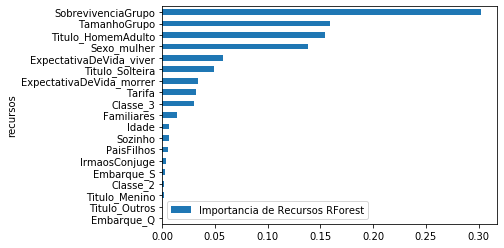

In [297]:
feature_dataframe.sort_values(by='Importancia de Recursos RForest').plot.barh(x='recursos')

In [298]:
meu_ensemble.fit(X_train,y_train)

VotingClassifier(estimators=[('KNN',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                   metric_params=None,
                                                   n_jobs=None, n_neighbors=10,
                                                   p=2, weights='uniform')),
                             ('RBF',
                              SVC(C=0.5, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,
                                  decision_function_shape='ovr', degree=3,
                                  gamma=0.1, kernel='rbf', max_iter=-1,
                                  probability=True, random...
                                                     splitter='best')),
                             ('NB',
                              Gaussia

In [299]:
meu_ensemble.score(X_test,y_test)

0.8917910447761194

In [300]:
test.shape

(418, 23)

In [301]:
X_test.shape

(268, 19)

In [303]:
ensemble_pred = meu_ensemble.predict(test[recursos])

In [304]:
ensemble_pred

array([0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 1.

In [305]:
ensemble_pred.shape

(418,)

In [308]:
test.index

Int64Index([ 892,  893,  894,  895,  896,  897,  898,  899,  900,  901,
            ...
            1300, 1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309],
           dtype='int64', name='PassengerId', length=418)

<a name="submissao"></a>

# Submissão

<br>

[início](#topo)

In [309]:
submissao = pd.DataFrame({
    'PassengerId':test.index,
    'Survived':ensemble_pred
})

In [310]:
submissao.head()

,PassengerId,Survived
0,892,0.0
1,893,0.0
2,894,0.0
3,895,0.0
4,896,1.0


In [311]:
submissao.shape

(418, 2)

In [314]:
submissao['Survived'] = submissao['Survived'].astype('int')

In [316]:
submissao.to_csv('meu_ensemble.csv',index=False)

In [317]:
submissao.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
